In [1]:
# numpy
import numpy as np
# pandas
import pandas as pd
# pyplot
import matplotlib.pyplot as plt
# seaborn
import seaborn as sns

%matplotlib inline

sns.set(color_codes=True)
sns.set_palette("Set2");

In [2]:
# import tips dataset from seaborn
tips = sns.load_dataset("tips")

In [3]:
# set pandas dataframe for tips dataset
df = pd.DataFrame(data=tips)

# Exploratory Analysis

The tips dataset coins the records of tips received by a restaurant over a four day period. It also contains a set of variables that may have an impact on the amount of the tip. This notebook will explore the dataset and investigate the relationship between these variables and the influence on the tip.

In [4]:
# head of tips dataset displaying first 5 rows of dataset
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


The head function gives a glimpse at the dataset, showing the first five rows. It also shows the types of data in the dataset, 3 columns of numerical data and 3 columns of categorical data. This also gives an indication of what variables may have an influence on the tip apart from the cost of the total bill. 

In [5]:
# last 5 rows of dataset
df.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


The tail function indicates that the dataset may be complete, with no gaps or missing data.

In [6]:
# Description of dataset
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


The describe function shows the the distribution of the dataset which is illustrated below.

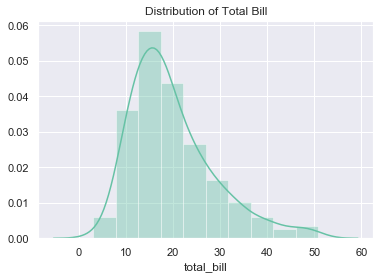

In [7]:
sns.distplot(df['total_bill'], bins=10);
plt.title("Distribution of Total Bill");

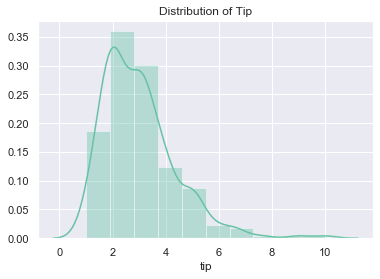

In [8]:
sns.distplot(df['tip'], bins=10);
plt.title("Distribution of Tip");

The distribution of the total bill and tip are of a similar shape which indicates a correlation between the two.

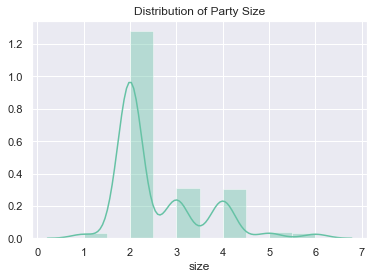

In [9]:
sns.distplot(df['size'], bins=10);
plt.title("Distribution of Party Size");

In [10]:
# description of just male customers in dataset
male = df.loc[(df.sex=="Male")];
male.describe()

,total_bill,tip,size
count,157.000000,157.000000,157.000000
mean,20.744076,3.089618,2.630573
std,9.246469,1.489102,0.955997
min,7.250000,1.000000,1.000000
25%,14.000000,2.000000,2.000000
50%,18.350000,3.000000,2.000000
75%,24.710000,3.760000,3.000000
max,50.810000,10.000000,6.000000


In [11]:
# description of female customers in dataset
female = df.loc[(df.sex=="Female")];
female.describe()

,total_bill,tip,size
count,87.000000,87.000000,87.000000
mean,18.056897,2.833448,2.459770
std,8.009209,1.159495,0.937644
min,3.070000,1.000000,1.000000
25%,12.750000,2.000000,2.000000
50%,16.400000,2.750000,2.000000
75%,21.520000,3.500000,3.000000
max,44.300000,6.500000,6.000000


When the dataset is seperated between male and female it is evident that more male customers attended the restaurant during this period. This notebook will explore whether this difference has a significant impact on the dataset.

In [12]:
# description of smokers in dataset 
s = df.loc[(df.smoker=="Yes")];
s.describe()

,total_bill,tip,size
count,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602
std,9.832154,1.401468,0.810751
min,3.070000,1.000000,1.000000
25%,13.420000,2.000000,2.000000
50%,17.920000,3.000000,2.000000
75%,26.860000,3.680000,3.000000
max,50.810000,10.000000,5.000000


In [13]:
# description of non-smokers in dataset
ns = df.loc[(df.smoker=="No")];
ns.describe()

,total_bill,tip,size
count,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874
std,8.255582,1.377190,1.017984
min,7.250000,1.000000,1.000000
25%,13.325000,2.000000,2.000000
50%,17.590000,2.740000,2.000000
75%,22.755000,3.505000,3.000000
max,48.330000,9.000000,6.000000


There are significantly more non-smokers than non-smokers in the dataset. One of the questions that might be asked before the datset is analysed is whether smokers may tip more than non-smokers. In the description of the dataset, the mean tip of smokers is higher than the mean tip on non-smokers but so do is the mean total bill. 

# Relationship between total bill and tip

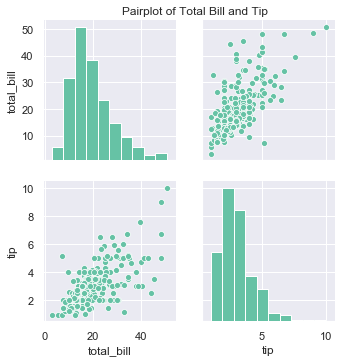

In [14]:
# pairplot of total bill and tip 
sns.pairplot(tips, x_vars=["total_bill", "tip"], y_vars=["total_bill", "tip"]);
plt.title("Pairplot of Total Bill and Tip",  {'horizontalalignment': "right"});

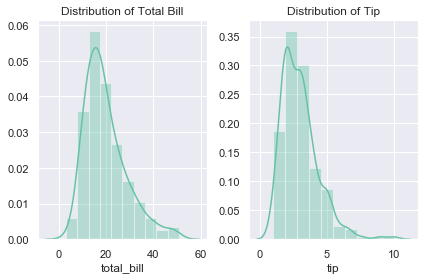

In [15]:
# histogram of total bill and tips side by side
plt.subplot(1,2,1)
sns.distplot(tips['total_bill'], bins=10);
plt.title("Distribution of Total Bill");

plt.subplot(1,2,2)
sns.distplot(tips['tip'], bins=10);
plt.title("Distribution of Tip");

plt.tight_layout()


The distribution of both the total bill and tip are similar indicating a correlation between the total amount spent and total amount tipped.

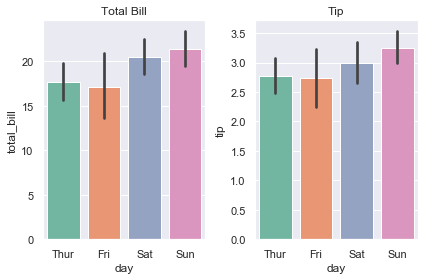

In [16]:
# bar plot of total bil every day
plt.subplot(1,2,1)
sns.barplot(x='day', y='total_bill', data=df)
plt.title("Total Bill");

# bar plot of tip every day
plt.subplot(1,2,2)
sns.barplot(x='day', y='tip', data=df)
plt.title("Tip");
plt.tight_layout()

This barplot further illustrates the relationship between the total bill and tip. When measuring the these numbers over a four day period it can been seen that the tips rise and fall each day in correlation with the total bill.

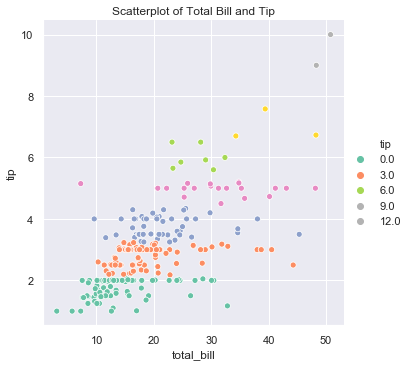

In [17]:
# scatterplot of total bill and tip
sns.relplot(x="total_bill", y="tip", hue="tip", data=df, palette="Set2");
plt.title("Scatterplot of Total Bill and Tip");

In this scatterplot you can see how the value of the tip increases as the total bil increases.

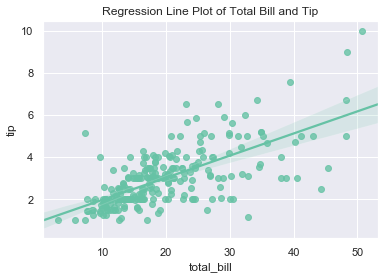

In [18]:
# regression line plot of total bill and tip
sns.regplot(x='total_bill', y='tip', data=df);
plt.title("Regression Line Plot of Total Bill and Tip");

Overall it appears that their is a strong relationship between the total bill and tip.

# Relationship between variables

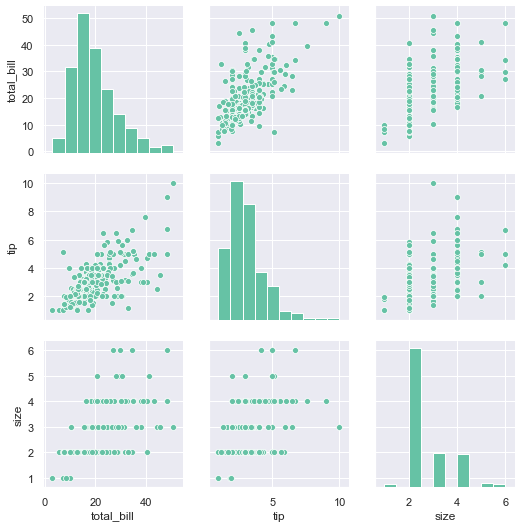

In [19]:
# pair plot of dataset
sns.pairplot(tips);

## Sex 

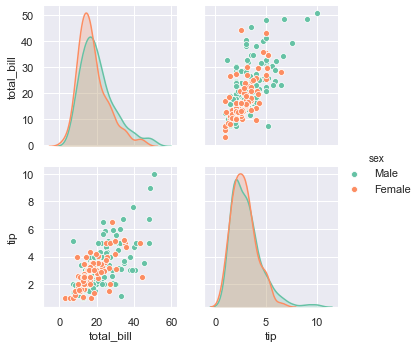

In [20]:
# pair plot of total bill and tip differenciated by sex
sns.pairplot(tips, x_vars=["total_bill", "tip"], y_vars=["total_bill", "tip"], hue="sex");


This pairplot identifies some elements of the dataset that may be worth exploring. From the distributions of both the total bill and tip we can see that the men have spent and tipped more than women. Earlier in the notebook, it  was identified that significanly more men have attended the restaurant. I will later explore whether this has a significant influence on the distribution of tips.

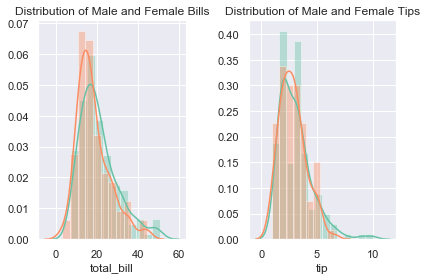

In [21]:
# distribution of male and female bills
plt.subplot(1,2,1);
sns.distplot(male["total_bill"]);
sns.distplot(female["total_bill"]);
plt.title("Distribution of Male and Female Bills");

# distribution of male and female tips
plt.subplot(1,2,2);
sns.distplot(male["tip"]);
sns.distplot(female["tip"]);
plt.title("Distribution of Male and Female Tips");

plt.tight_layout()

Here we can see that in the distribution of the total bill a higher concentration of women spend a lower amount than men. This is also similarly reflected in the distribution of tips.

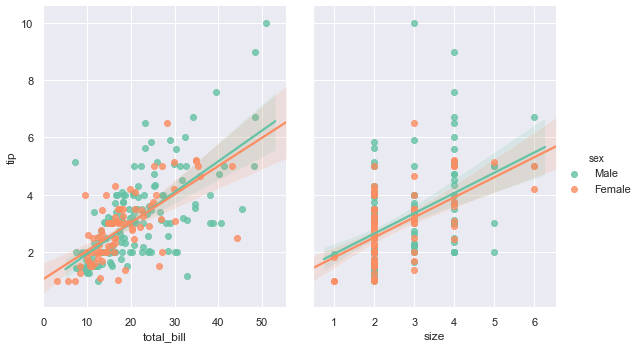

In [22]:
# pairplot with total bill and party six on x axis and tip on y axis
# hue distinguishing between male and female
sns.pairplot(df, x_vars=["total_bill", "size"], y_vars=["tip"],
             hue="sex", height=5, aspect=.8, kind="reg");

This observation is further supported by the the regression line plot of the total bill and tip. However, as noted earlier this may be influenced by the higher number of men who attended the restaurant.

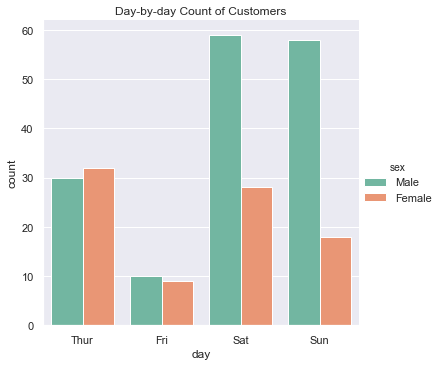

In [23]:
# count of number of customers each day separating male and female
sns.catplot(x="day", hue="sex", kind="count", data=df);
plt.title("Day-by-day Count of Customers");

The difference between the number of men and women who attend the restaurant is most evident at the weekend. As such, the dataset will be separated in weekday and weekend to see if there is a significant differene between the tips of men and women.

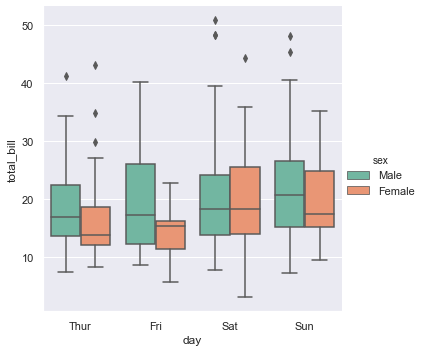

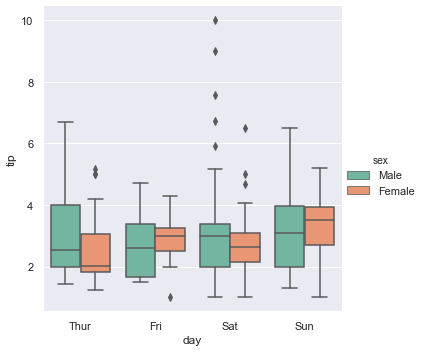

In [66]:
# box plot of total bill
sns.catplot(x="day", y="total_bill", hue="sex", kind="box", data=df);

# box plot of tip
sns.catplot(x="day", y="tip", hue="sex", kind="box", data=df);

The box plot shows the distribution of cost and tips across the four day period. Male cost and tips have a higher maximum point in both instances. Interestingly, the median for female tips is higher on two days, Friday and Sunday, despite the median for female costs not being higher than male on any day.

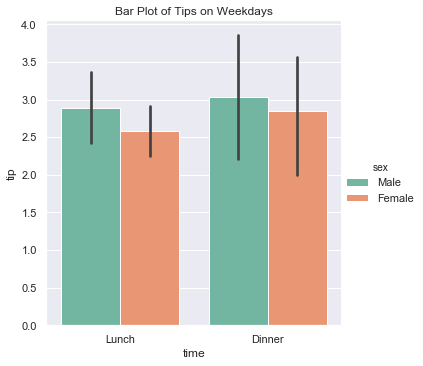

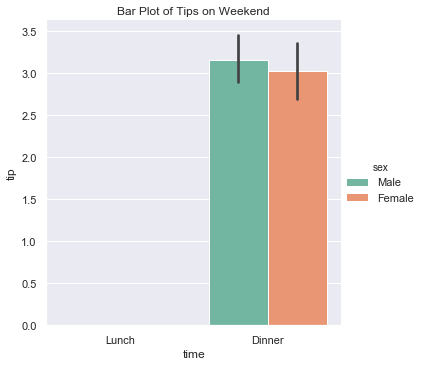

In [24]:
# barplot of weekday
weekday = df.loc[(df.day=="Thur")|(df.day=="Fri")]
sns.catplot(x="time", y="tip", kind="bar", hue="sex", data=weekday);
plt.title("Bar Plot of Tips on Weekdays");

# barplot of weekend 
weekend = df.loc[(df.day=="Sat")|(df.day=="Sun")]
sns.catplot(x="time", y="tip", kind="bar", hue="sex", data=weekend);
plt.title("Bar Plot of Tips on Weekend");

The average tip for the weekend is higher than the average tip on weekdays with men tipping more in each instance.

It is also evident that the restaurant does not serve lunch on the weekend, only dinner. As such, the next variable that will be examined is whether or not there is a significant difference between tips for lunch and dinner.

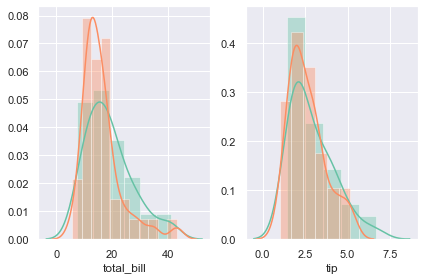

In [25]:
# dataframe of just male weekday data
mwd = male.loc[(male.day=="Thur")|(male.day=="Fri")];

# dataframe of just female weekday data
fwd = female.loc[(female.day=="Thur")|(female.day=="Fri")];

# distribution of male and female bills on weekdays
plt.subplot(1,2,1)
sns.distplot(mwd["total_bill"]);
sns.distplot(fwd["total_bill"]);

plt.subplot(1,2,2)
sns.distplot(mwd["tip"]);
sns.distplot(fwd["tip"]);

plt.tight_layout()

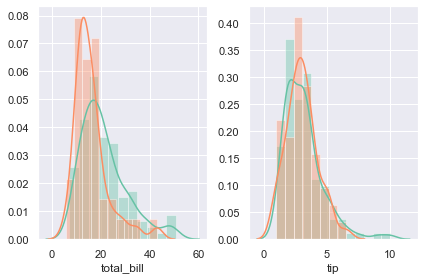

In [26]:
# dataframe of just male weekend data
mwk = male.loc[(male.day=="Sat")|(male.day=="Sun")];

# dataframe of just female weekend data
fwk = female.loc[(female.day=="Sat")|(female.day=="Sun")];

# distribution of male and female bills on weekdays
plt.subplot(1,2,1)
sns.distplot(mwk["total_bill"]);
sns.distplot(fwd["total_bill"]);

plt.subplot(1,2,2)
sns.distplot(mwk["tip"]);
sns.distplot(fwk["tip"]);

plt.tight_layout()

While looking at multiple variables it appears than men tip more than women overall. However there are instances of women tipping more than the average when considering their total bill. This indicates that there may be other factors that determine the tip amount.

# Time

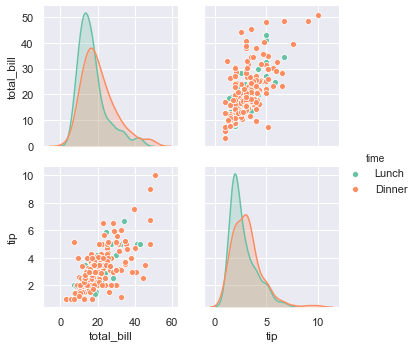

In [27]:
# pair plot of total bill and tips differenciated by time
sns.pairplot(tips, x_vars=["total_bill", "tip"], y_vars=["total_bill", "tip"], hue="time");

This pair plot highlights that the total bill and tip for dinner is higher on average than the total bill and tip for lunch.

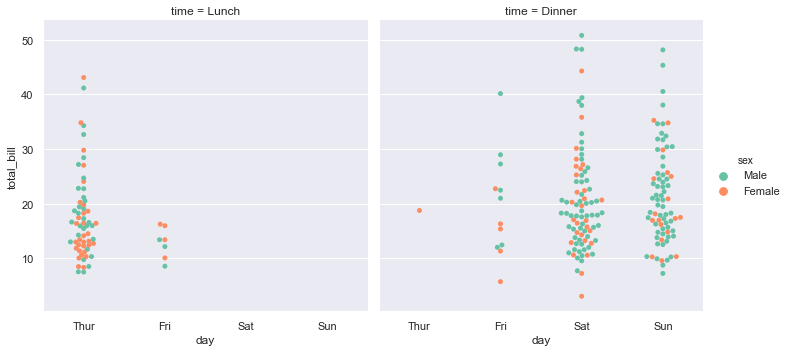

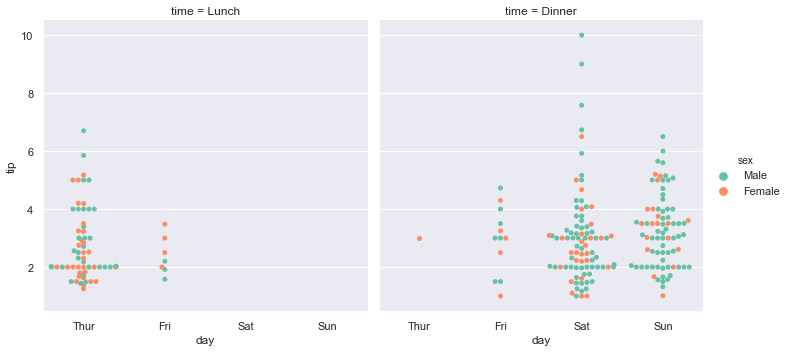

In [28]:
# catplot of total bill broken down by day and sex of customer
sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", col="time", data=df);

# catplot of tip broken down by day and sex of customer
sns.catplot(x="day", y="tip", hue="sex", kind="swarm", col="time", data=df);

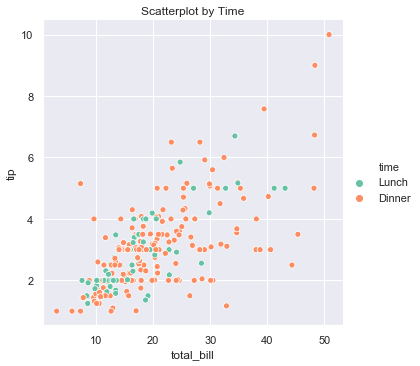

In [29]:
# scatterplot of total bill and tip by time
sns.relplot(x="total_bill", y="tip", hue="time", data=tips);
plt.title("Scatterplot by Time");

The cost and tip at dinner time appears to be higher than at lunch time overall. 

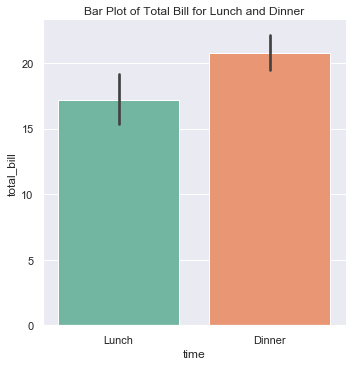

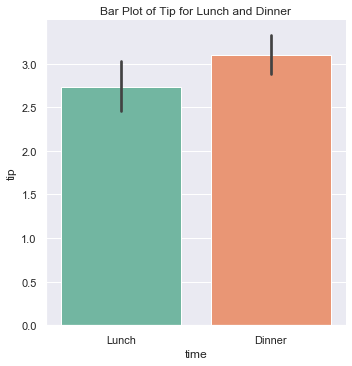

In [30]:
# bar plot of total for lunch and dinner
sns.catplot(x="time", y="total_bill", kind="bar", data=df);
plt.title("Bar Plot of Total Bill for Lunch and Dinner");

# bar plot of tip for lunch and dinner
sns.catplot(x="time", y="tip", kind="bar", data=df);
plt.title("Bar Plot of Tip for Lunch and Dinner");

This reiterated when looking at the average cost and average tip at lunch and dinner. The amount tipped appears to be closely associated with the overall cost with a higher tip for dinner time.

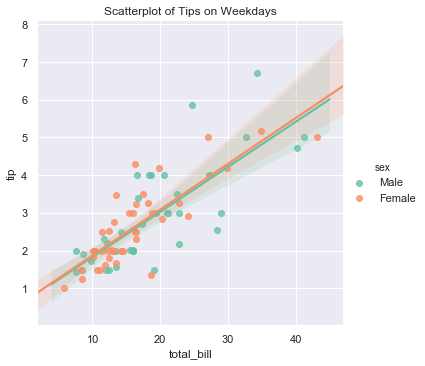

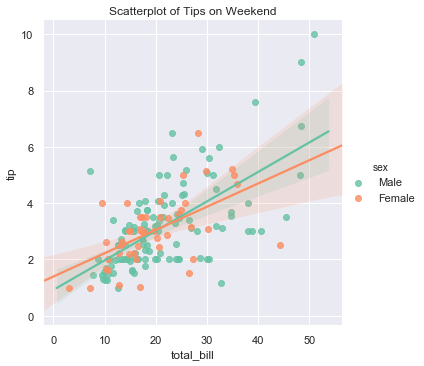

In [31]:
# linear regression model of weekday
weekday = df.loc[(df.day=="Thur")|(df.day=="Fri")]
sns.lmplot("total_bill", "tip", hue="sex", data=weekday);
plt.title("Scatterplot of Tips on Weekdays");

# linear regression model of weekend 
weekend = df.loc[(df.day=="Sat")|(df.day=="Sun")]
sns.lmplot("total_bill", "tip", hue="sex", data=weekend);
plt.title("Scatterplot of Tips on Weekend");

These plots indicate that the total bill and tips of both male and female customers are more inline during the weekdays. As such the higher number of men at the weekend may skew the numbers overall.

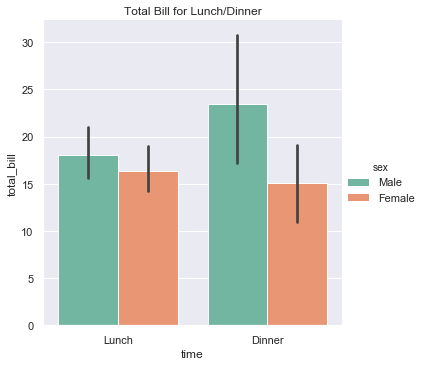

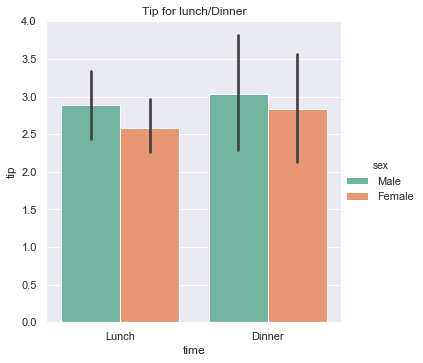

In [32]:
# bar plot of total bill separated by lunch/dinner and sex of customers
sns.catplot(x="time", y="total_bill", hue="sex", kind="bar", data=weekday);
plt.title("Total Bill for Lunch/Dinner");

# bar plot of total bill separated by lunch/dinner and sex of customers
sns.catplot(x="time", y="tip", hue="sex", kind="bar", data=weekday);
plt.title("Tip for lunch/Dinner");


Looking at the average cost of dinner on weekdays men spend significantly more. However the difference in male and female tips is less significant perhaps indicating the other variables may have a bigger influence on the tip. 

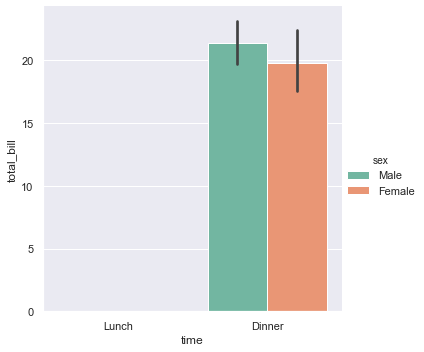

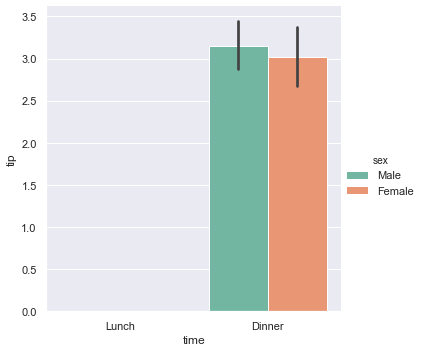

In [33]:
sns.catplot(x="time", y="total_bill", hue="sex", kind="bar", data=weekend);

sns.catplot(x="time", y="tip", hue="sex", kind="bar", data=weekend);

On weekends, men spend marginally more on average than women and the bar plot for the tips reiterates that.

# Smoker/Non-Smoker

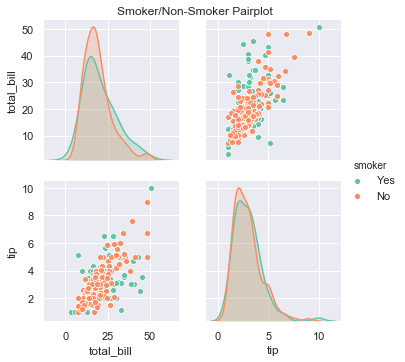

In [34]:
sns.pairplot(tips, x_vars=["total_bill", "tip"], y_vars=["total_bill", "tip"], hue="smoker");
plt.title("Smoker/Non-Smoker Pairplot",  {'horizontalalignment': "right"});

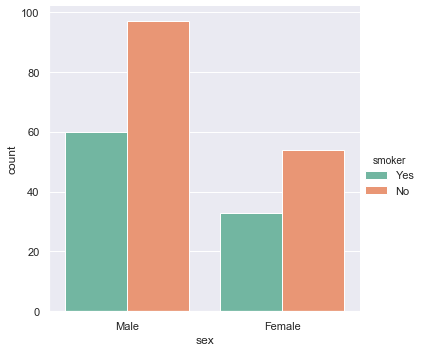

In [67]:
sns.catplot(x="sex", kind="count", hue="smoker", data=df);

There are more non-smokers than smokers across genders.

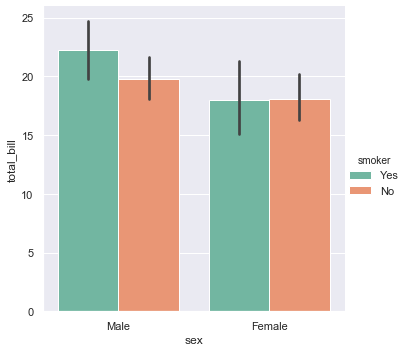

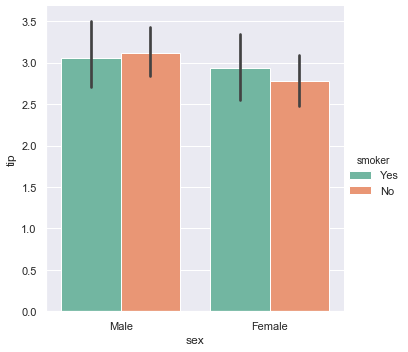

In [35]:
# Bar chart of male and female tips differenciating between smoker and non-smoker
sns.catplot(x="sex", y="total_bill", hue="smoker", kind=("bar"), data=df);

sns.catplot(x="sex", y="tip", hue="smoker", kind=("bar"), data=df);

While the average total bill of male smokers is higher than that of non-smokers, the average tip is lower for male smokers. The opposit is true of female smokers.

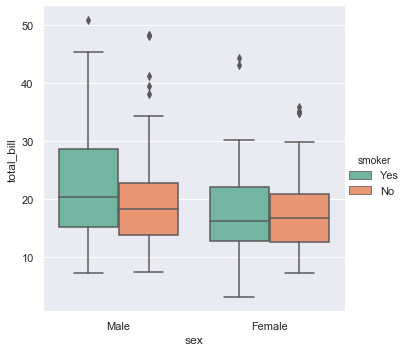

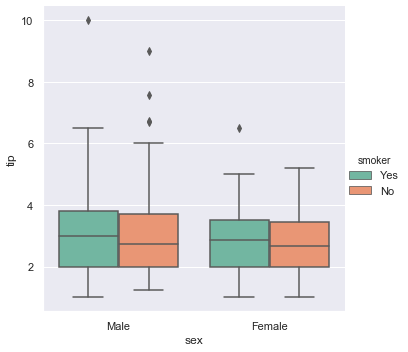

In [68]:
sns.catplot(x="sex", y="total_bill", hue="smoker", kind=("box"), data=df);

sns.catplot(x="sex", y="tip", hue="smoker", kind=("box"), data=df);

The median total bill and tip of men appear to be directly related whether they are smokers or not. However, the median tip of female smokers is higher than non-smokers despite the opposite being true for the total bill.

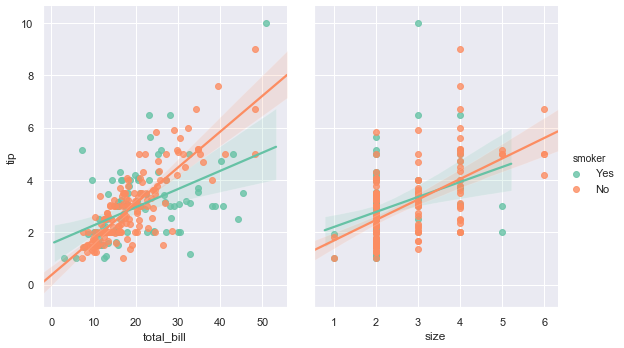

In [36]:
sns.pairplot(df, x_vars=["total_bill", "size"], y_vars=["tip"],
             hue="smoker", height=5, aspect=.8, kind="reg");

It is evident from the regression plot that there is a significant difference between the tips of smokers and non-smokers.

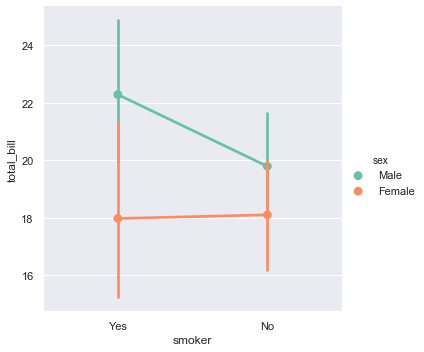

In [39]:
sns.catplot(x="smoker", y="total_bill", hue="sex", kind="point", data=df);

Male smokers spend more on average than male none smokers while female smokers and non-smokers are alot closer when it comes to the total bill. How is this reflected in tips?

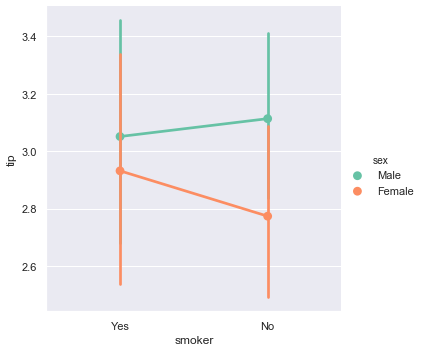

In [40]:
sns.catplot(x="smoker", y="tip", hue="sex", kind="point", data=df);

Female smokers tip significantly more than non-smokers when compared to men.

# Day

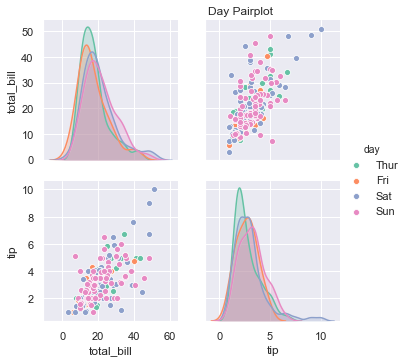

In [37]:
sns.pairplot(tips, x_vars=["total_bill", "tip"], y_vars=["total_bill", "tip"], hue="day");
plt.title("Day Pairplot",  {'horizontalalignment': "right"});

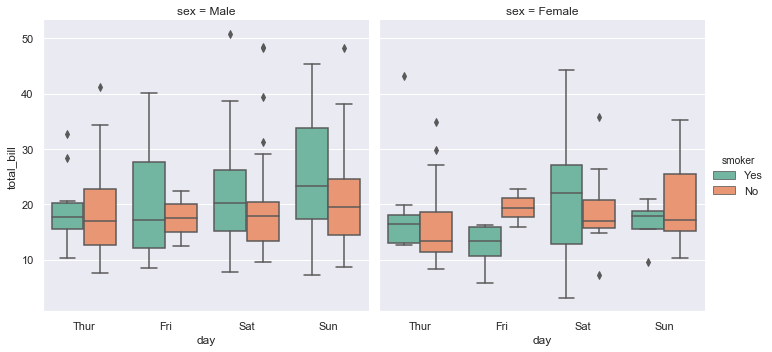

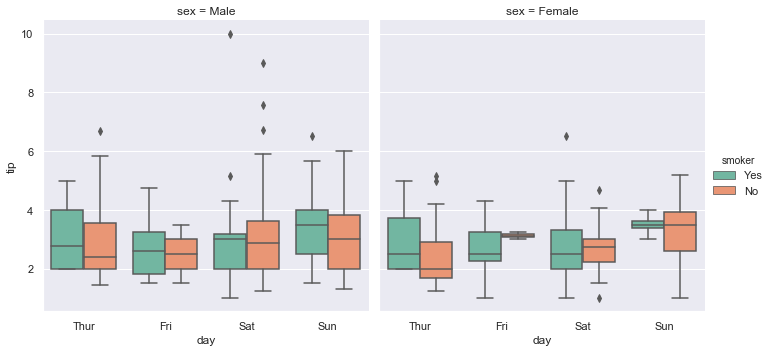

In [38]:
# box plot of total bill and tips segretating between male and female
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", col="sex", data=df);

sns.catplot(x="day", y="tip", hue="smoker", kind="box", col="sex", data=df);

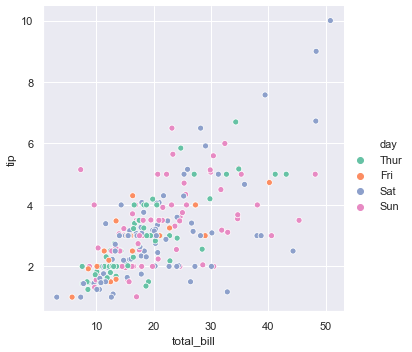

In [41]:
sns.relplot(x="total_bill", y="tip", hue="day", data=tips);

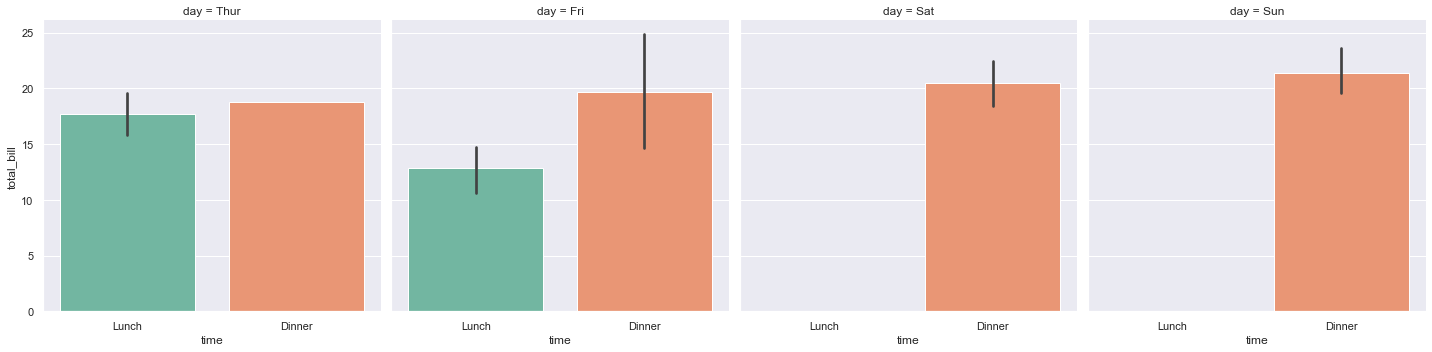

In [42]:
sns.catplot(x="time", y="total_bill", col="day", kind=("bar"), data=tips);

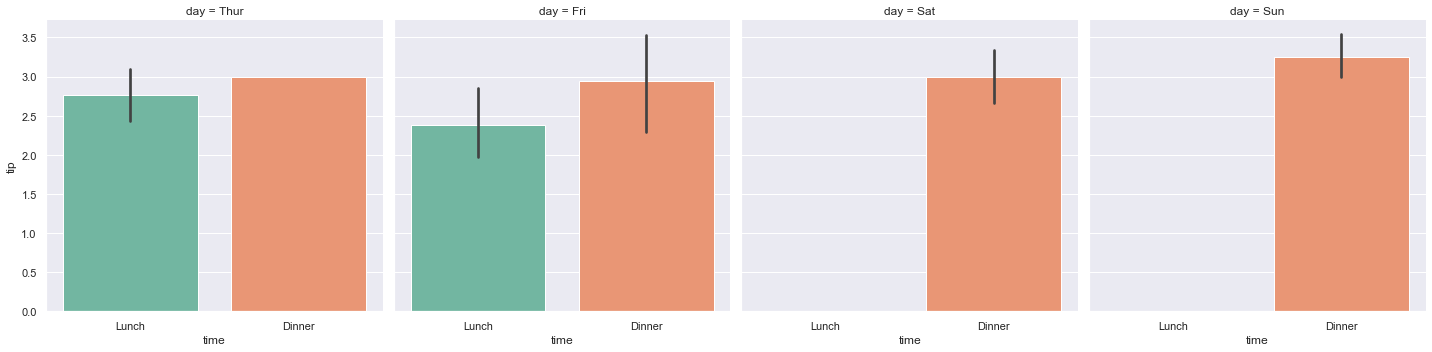

In [43]:
sns.catplot(x="time", y="tip", col="day", kind=("bar"), data=tips);

# Party Size

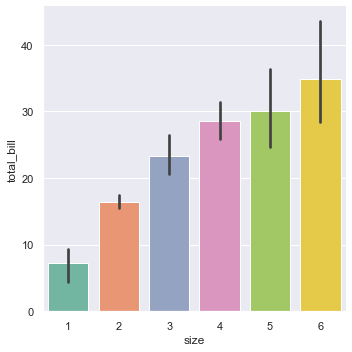

In [44]:
# scatterplot of tips based on party size 
sns.catplot(x="size", y="total_bill", kind=("bar"), data=df);

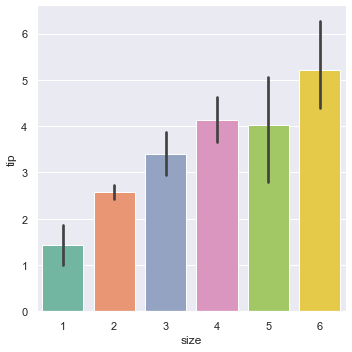

In [45]:
# scatterplot of tips based on party size 
sns.catplot(x="size", y="tip", kind=("bar"), data=df);

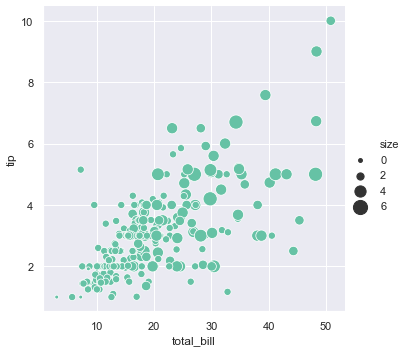

In [54]:
# Scatterplot with party size as third dimension
sns.relplot(x="total_bill", y="tip", size="size", sizes=(15, 200), data=tips, palette="Set2");

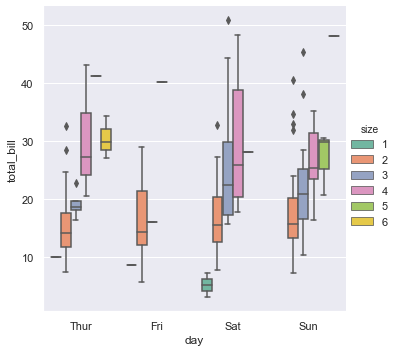

In [58]:
sns.catplot(x="day", y="total_bill", kind="box", hue="size", data=df);

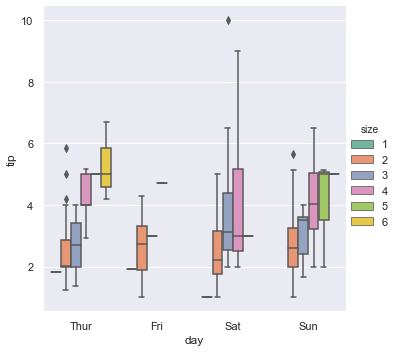

In [59]:
sns.catplot(x="day", y="tip", kind="box", hue="size", data=df);

# Break

This reiterates that men spend more and tip more than women overall. However, the significant difference between the number of men and women that attend at the weekend will be examined further to see if there is a relationship.

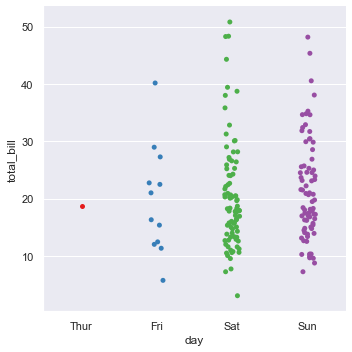

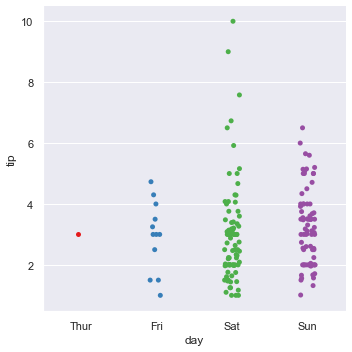

In [44]:
din = df.loc[(df.time=="Dinner")];
lun = df.loc[(df.time=="Lunch")];

sns.catplot(x="day", y="total_bill", data=din, palette="Set1");

sns.catplot(x="day", y="tip", data=din, palette="Set1");

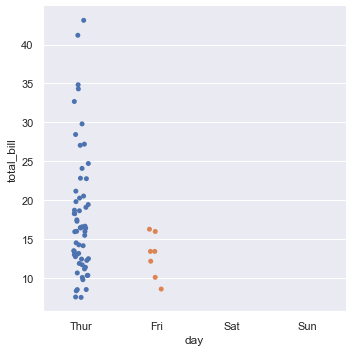

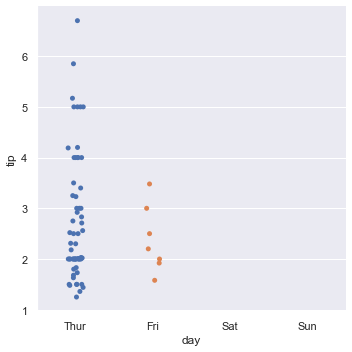

In [45]:
sns.catplot(x="day", y="total_bill", data=lun);

sns.catplot(x="day", y="tip", data=lun);

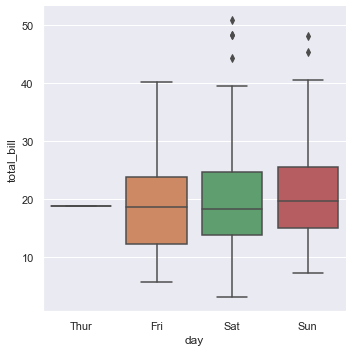

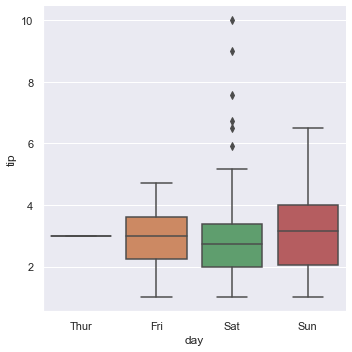

In [46]:
sns.catplot(x="day", y="total_bill", kind="box", data=din);

sns.catplot(x="day", y="tip", kind="box", data=din);

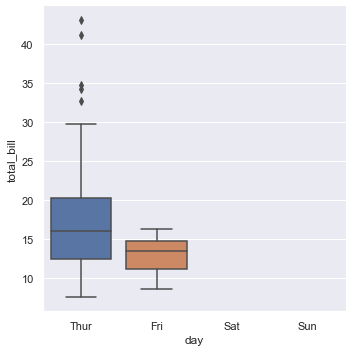

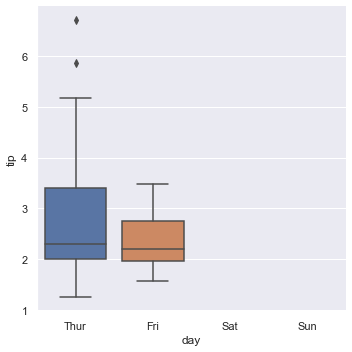

In [47]:
sns.catplot(x="day", y="total_bill", kind="box", data=lun);

sns.catplot(x="day", y="tip", kind="box", data=lun);

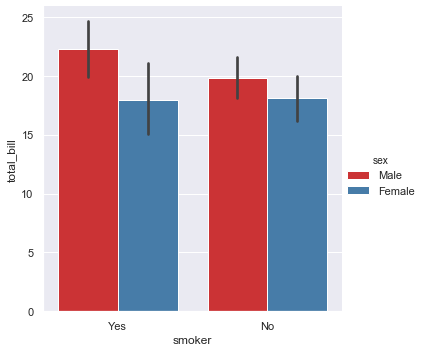

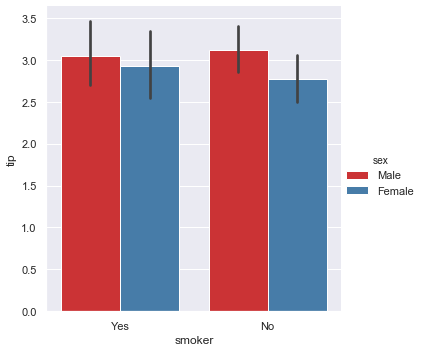

In [48]:
# bar chart of total bill differentiating between male/female smokers
sns.catplot(x="smoker", y="total_bill", hue="sex", kind="bar", data=df, palette="Set1");

# bar chart of tip differentiating between male/female smokers
sns.catplot(x="smoker", y="tip", hue="sex", kind="bar", data=df, palette="Set1");

Here we can see that male smokers have spent more than male non-smokers but tip less. Alternatively female smokers and non-smokers have spent roughly the same but smokers tipped slightly more.

## Smoker 

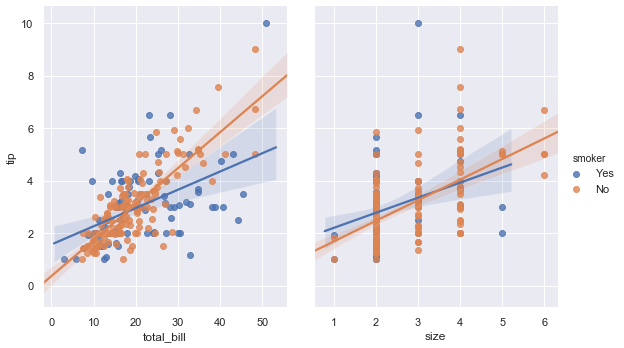

In [49]:
sns.pairplot(df, x_vars=["total_bill", "size"], y_vars=["tip"],
             hue="smoker", height=5, aspect=.8, kind="reg");

Non-smokers seem to tip more than smokers but also outnumber smokers significantly.

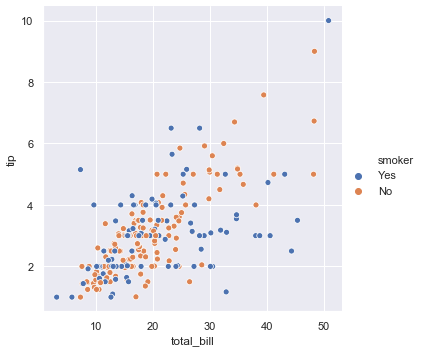

In [50]:
# Scatterplot of 3 dimensions of data, total bill, tip, and whether the customer was a smoker 
sns.relplot(x="total_bill", y="tip", hue="smoker", data=df);

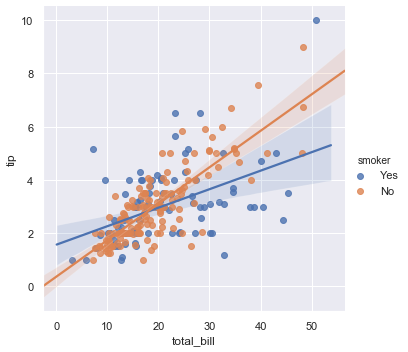

In [51]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=df, );

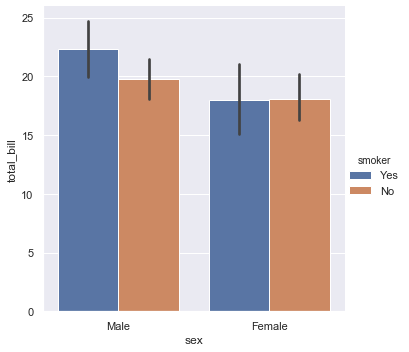

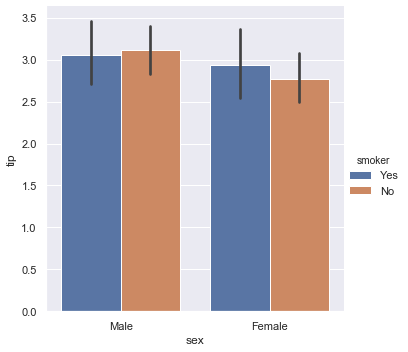

In [52]:
# Bar chart of male and female tips differenciating between smoker and non-smoker
sns.catplot(x="sex", y="total_bill", hue="smoker", kind=("bar"), data=df);

sns.catplot(x="sex", y="tip", hue="smoker", kind=("bar"), data=df);

Male smokers tip less than male non-smokers while spending more on the total bill. However, female smokers tip more than non-smokers despite spending less on the total bill, on average.

## Party Size

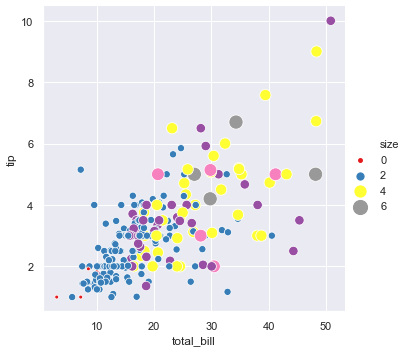

In [53]:
# Scatterplot with party size as third dimension
sns.relplot(x="total_bill", y="tip", hue="size", size="size", sizes=(15, 200), data=tips);

In [54]:
# scatterplot of tips based on party size 
sns.catplot(x="size", y="tip", kind=("bar"), data=tips), palette="Set1";

SyntaxError: can't assign to function call (<ipython-input-54-aafb9d8f42d0>, line 2)

In [ ]:
sns.catplot(x="size", y="tip", kind=("bar"), hue="sex", data=tips);

In [ ]:
sns.catplot(x="size", y="tip", kind=("bar"), hue="smoker", data=tips);

In [ ]:
sns.catplot(x="size", y="tip", kind=("bar"), hue="time", data=tips);

In [ ]:
sns.catplot(x="size", y="tip", kind=("bar"), hue="day", data=tips);

## Time

In [ ]:
sns.pairplot(tips, hue="time", palette="husl");

In [ ]:
sns.relplot(x="total_bill", y="tip", hue="time", data=tips);

In [ ]:
sns.catplot(x="time", y="total_bill", kind=("bar"), data=tips);

sns.catplot(x="time", y="tip", kind=("bar"), data=tips);

In [ ]:
sns.catplot(x="time", y="tip", kind=("bar"), hue="sex", data=tips);

In [ ]:
sns.catplot(x="time", y="tip", kind=("bar"), hue="smoker", data=tips);

In [ ]:
sns.catplot(x="time", y="tip", kind=("bar"), hue="day", data=tips);

## Day

In [ ]:
sns.relplot(x="total_bill", y="tip", hue="day", data=tips);

In [ ]:
sns.catplot(x="time", y="total_bill", col="day", kind=("bar"), height=10, aspect=.8, data=tips);

sns.catplot(x="time", y="tip", col="day", kind=("bar"), height=10, aspect=.8, data=tips);



## Pandas

In [70]:
# created pivot table of dataset
fp = tips.pivot_table(index='day', columns='size', values='tip');

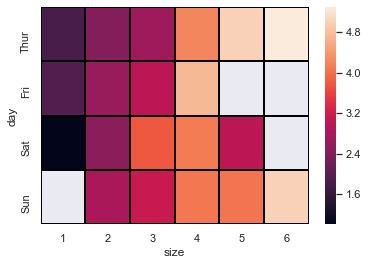

In [71]:
# heatmp of day, size, and tip
sns.heatmap(fp, linecolor='black', linewidth=1);

In [72]:
tc = tips.corr()

In [73]:
tc

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


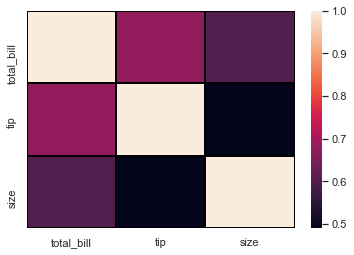

In [74]:
sns.heatmap(tc, linecolor='black', linewidth=1);